In [55]:
#pip install openpyxl

In [122]:
import pandas as pd
import glob
import os

folder_path = "Dataset"
excel_files = glob.glob(os.path.join(folder_path, "*-laporan_iklim_harian.xlsx"))

# Urutkan berdasarkan nomor file (1-34)
excel_files = sorted(
    excel_files,
    key=lambda x: int(os.path.basename(x).split('-')[0])
)

print(f"📂 Total file ditemukan: {len(excel_files)}")

all_data = []
error_files = []

for file in excel_files:
    file_name = os.path.basename(file)
    print(f"\n🔹 Sedang memproses: {file_name}")

    try:
        # Baca semua isi Excel tanpa header
        raw = pd.read_excel(file, header=None, dtype=str, engine="openpyxl")

        # Cari baris yang mengandung kata 'Tanggal' (dengan toleransi spasi atau karakter tak terlihat)
        header_row = None
        for i, row in raw.iterrows():
            if any("tanggal" in str(cell).replace("\xa0", " ").strip().lower() for cell in row):
                header_row = i
                break

        if header_row is None:
            print(f"⚠️ Tidak ditemukan baris header 'Tanggal' di {file_name}")
            error_files.append(file_name)
            continue

        # Baca ulang mulai dari baris header
        df = pd.read_excel(file, skiprows=header_row, engine="openpyxl")
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        df = df.dropna(axis=1, how='all')  # hapus kolom kosong
        df = df.dropna(how='all')  # hapus baris kosong

        # Hapus bagian bawah yang mengandung 'KETERANGAN' dan baris setelahnya
        mask = df.astype(str).apply(lambda x: x.str.contains("KETERANGAN", case=False, na=False))
        if mask.any().any():
            stop_index = mask.any(axis=1).idxmax()
            df = df.loc[:stop_index - 1]

        # Hapus baris yang berisi '8888' atau '9999' dalam keterangan bawah
        df = df[~df.astype(str).apply(lambda x: x.str.contains("8888|9999", na=False)).any(axis=1)]

        df = df.reset_index(drop=True)
        all_data.append(df)

    except Exception as e:
        print(f"❌ Error membaca {file_name}: {e}")
        error_files.append(file_name)
        continue

# Gabungkan semua data
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    expected_cols = ["TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR",
                     "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"]

    # Cek dan ubah nama kolom jika cocok jumlahnya
    if len(final_df.columns) == len(expected_cols):
        final_df.columns = expected_cols
    else:
        print(f"⚠️ Jumlah kolom berbeda ({len(final_df.columns)}). Kolom saat ini:")
        print(final_df.columns.tolist())

    # Simpan hasil akhir
    output_path = os.path.join(folder_path, "gabungan_laporan_iklim_final.xlsx")
    final_df.to_excel(output_path, index=False)
    print(f"\n✅ Semua file berhasil digabung ke: {output_path}")
else:
    print("\n❌ Tidak ada file yang berhasil diproses.")

# Laporkan file bermasalah (jika ada)
if error_files:
    print("\n⚠️ File yang bermasalah dan dilewati:")
    for f in error_files:
        print("  -", f)
else:
    print("\n🎉 Semua file sukses digabung tanpa error.")


📂 Total file ditemukan: 34

🔹 Sedang memproses: 1-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 2-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 3-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 4-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 5-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 6-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 7-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 8-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 9-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 10-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 11-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 12-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 13-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 14-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 15-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 16-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 17-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 18-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 19-laporan_iklim_harian.xlsx

🔹 Sedang memproses: 20-laporan_

In [ ]:
#asli

import pandas as pd
import glob
import os

folder_path = "Dataset"

# Ambil semua file Excel di folder
excel_files = glob.glob(os.path.join(folder_path, "*-laporan_iklim_harian.xlsx"))

# Urutkan berdasarkan angka di depan nama file (misal 1-, 2-, 10-)
excel_files = sorted(
    excel_files,
    key=lambda x: int(os.path.basename(x).split('-')[0]),
    reverse=True
    # ambil angka sebelum tanda '-'
)

all_data = []

for file in excel_files:
    print(f"🔹 Sedang memproses: {file}")
    
    df = pd.read_excel(file)
    total_rows = len(df)
    
    rows_to_delete = list(range(0, 7)) + list(range(35, 54))
    rows_to_delete = [i for i in rows_to_delete if i < total_rows]
    
    df = df.drop(rows_to_delete).reset_index(drop=True)
    all_data.append(df)

# Gabungkan semua file jadi satu
final_df = pd.concat(all_data, ignore_index=True)

final_df.columns = [
    "TANGGAL", "TN", "TX", "TAVG", "RH_AVG", "RR", 
    "SS", "FF_X", "DDD_X", "FF_AVG", "DDD_CAR"
]

output_path = os.path.join(folder_path, "gabungan_laporan_iklim.xlsx")
final_df.to_excel(output_path, index=False)

print("✅ Semua file sudah digabung urut sesuai bulan.")


🔹 Sedang memproses: Dataset\34-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\33-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\32-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\31-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\30-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\29-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\28-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\27-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\26-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\25-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\24-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\23-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\22-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\21-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\20-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\19-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\18-laporan_iklim_harian.xlsx
🔹 Sedang memproses: Dataset\17-

ValueError: Length mismatch: Expected axis has 13 elements, new values have 11 elements

# Data Cleaning

In [132]:
import pandas as pd

df = pd.read_excel("Dataset/gabungan_laporan_iklim_final.xlsx")



In [133]:
df.head(5)

,TANGGAL,TN,TX,TAVG,RH_AVG,RR,SS,FF_X,DDD_X,FF_AVG,DDD_CAR
0,01-01-2023,23.6,29.8,26.3,87,14.5,0,4,320,1,C
1,02-01-2023,24.2,29.4,27.5,81,31.5,0.7,4,320,2,NW
2,03-01-2023,25,29.6,26.6,82,0.5,0,6,316,1,C
3,04-01-2023,24.4,30,26.4,86,2.4,-,5,316,1,C
4,05-01-2023,24,32.6,27.4,83,35.3,-,4,317,2,C


In [134]:
df.describe()

,FF_X,DDD_X,FF_AVG
count,896.000000,896.000000,896.000000
mean,4.522321,263.960938,1.125000
std,1.694405,92.409978,0.534821
min,0.000000,0.000000,0.000000
25%,3.000000,250.000000,1.000000
50%,4.000000,310.000000,1.000000
75%,5.000000,320.000000,1.000000
max,15.000000,360.000000,3.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   TANGGAL  896 non-null    object
 1   TN       896 non-null    object
 2   TX       896 non-null    object
 3   TAVG     896 non-null    object
 4   RH_AVG   896 non-null    object
 5   RR       896 non-null    object
 6   SS       896 non-null    object
 7   FF_X     896 non-null    int64 
 8   DDD_X    896 non-null    int64 
 9   FF_AVG   896 non-null    int64 
 10  DDD_CAR  896 non-null    object
dtypes: int64(3), object(8)
memory usage: 77.1+ KB


In [137]:
df.isna().sum()

TANGGAL    0
TN         0
TX         0
TAVG       0
RH_AVG     0
RR         0
SS         0
FF_X       0
DDD_X      0
FF_AVG     0
DDD_CAR    0
dtype: int64

In [139]:
df['TANGGAL'] = pd.to_datetime(df['TANGGAL'], dayfirst=True, errors='coerce')
numeric_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [141]:
# Data mapping for DDR_CAR

mapping = {
    'C': 0, #Calm
    'N': 0, #North
    'NE': 45, #North East
    'E': 90, #East
    'SE': 135, #South East 
    'S': 180, #South
    'SW': 225, #South West 
    'W': 270, #West 
    'NW': 315 #North West
}

df['DDD_CAR'] = df['DDD_CAR'].map(mapping)

In [142]:
df.duplicated().sum()

np.int64(0)

In [143]:
#Check how many rows in column RR has 8888 value


check8888 = (df == 8888).sum().sum()
print("8888 count in any column ", check8888)

check9999 = (df == 9999).sum().sum()
print("9999 count in any column ", check9999)



8888 count in any column  3
9999 count in any column  0


In [ ]:
# Fill 8888 values in any colomn

import numpy as np
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

#We replace 8888 to nan 
df.replace(8888, np.nan, inplace=True)

#We select all of the column that has nan value
num_cols = ['TN', 'TX', 'TAVG', 'RH_AVG', 'RR', 'SS','FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR'] 

#InterativeImputer 

imputer = IterativeImputer(
    estimator=RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ),
    random_state=42,
    max_iter=10
)

# Begin the imputer
df[num_cols] = imputer.fit_transform(df[num_cols])



c:\Users\Lenovo E15\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: [9]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Lenovo E15\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


ValueError: Columns must be same length as key

In [120]:
check888after = (df == 8888).sum().sum()
print(check888after)

0


# EDA 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TANGGAL  279 non-null    datetime64[ns]
 1   TN       279 non-null    float64       
 2   TX       279 non-null    float64       
 3   TAVG     279 non-null    float64       
 4   RH_AVG   279 non-null    float64       
 5   RR       279 non-null    float64       
 6   SS       279 non-null    float64       
 7   FF_X     279 non-null    float64       
 8   DDD_X    279 non-null    float64       
 9   FF_AVG   279 non-null    float64       
 10  DDD_CAR  279 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 24.1 KB


In [ ]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation =numeric_df.corrwith(df['RR']).abs()
print(correlation)

TN         0.465346
TX         0.220081
TAVG       0.414082
RH_AVG     0.397483
RR         1.000000
SS         0.149334
FF_X       0.038236
DDD_X      0.032136
FF_AVG     0.089194
DDD_CAR    0.078834
dtype: float64


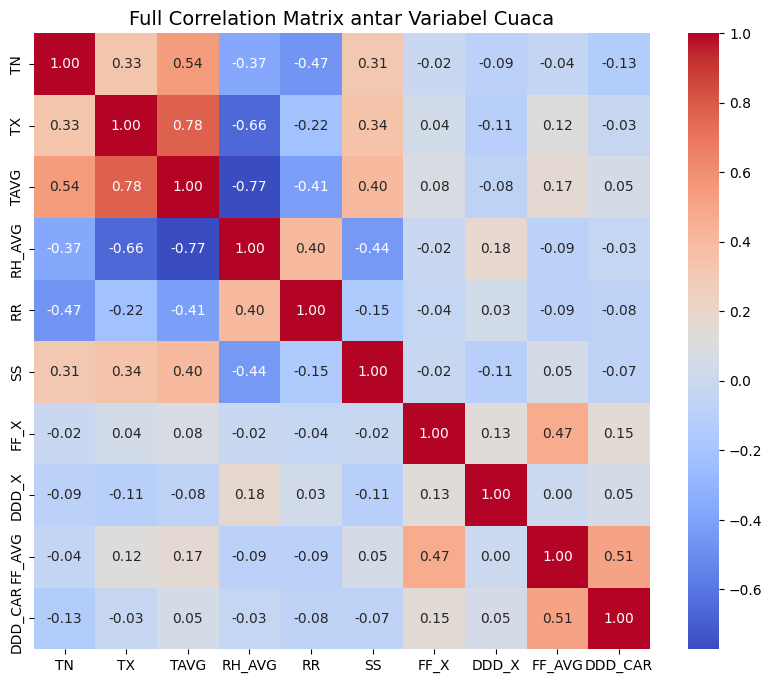

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kolom tanggal tidak ikut
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Buat matrix korelasi penuh
corr_matrix = numeric_df.corr()

# Visualisasikan dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Full Correlation Matrix antar Variabel Cuaca', fontsize=14)
plt.show()

# Data Modelling

In [82]:
data = df[['RR']]

In [83]:
data.head()

,RR
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [85]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.6 MB 7.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 8.1 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 8.3 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 8.0 MB/s  0:00:01

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   --------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [89]:
# buat fitur waktu tambahan
df['year'] = df['TANGGAL'].dt.year
df['month'] = df['TANGGAL'].dt.month
df['day'] = df['TANGGAL'].dt.day

# pisahkan fitur dan target
X = df[['year', 'month', 'day', 'TN', 'TX', 'TAVG', 'RH_AVG', 'SS', 'FF_X', 'DDD_X', 'FF_AVG', 'DDD_CAR']]
y = df['RR']


In [90]:
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [91]:
rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=10, 
    random_state=42
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 54.31003481541561
R² Score: 0.47194017700486424


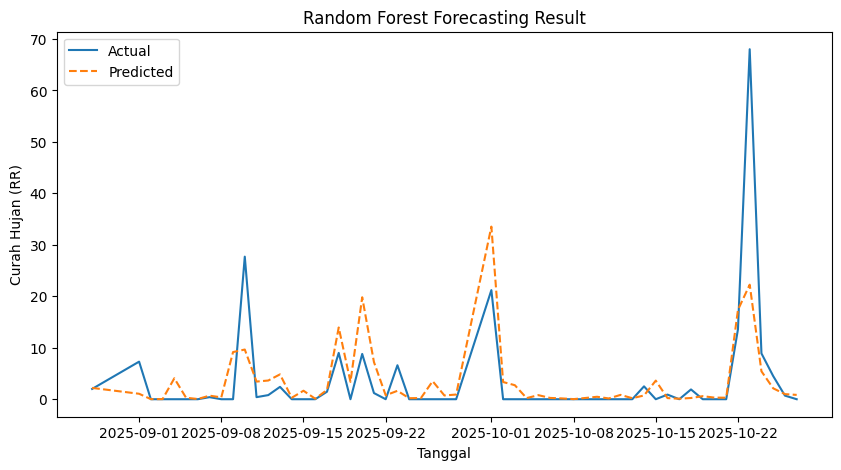

In [93]:


plt.figure(figsize=(10,5))
plt.plot(df['TANGGAL'].iloc[train_size:], y_test.values, label='Actual')
plt.plot(df['TANGGAL'].iloc[train_size:], y_pred, label='Predicted', linestyle='--')
plt.xlabel("Tanggal")
plt.ylabel("Curah Hujan (RR)")
plt.title("Random Forest Forecasting Result")
plt.legend()
plt.show()
